C:\Users\hesham\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=946
  warnings.warn(
C:\Users\hesham\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=581
  warnings.warn(
C:\Users\hesham\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=209
  warnings.warn(
C:\Users\hesham\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=185
  warnings.warn(
C:\Users\hesham\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=583
  warnings.warn(
C:\Users\hesham\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=214
  warnings.warn(
C:\Users\hesham\anaconda3\lib\site-packages\li

Epoch 1/100
13/13 [==============================] - 4s 65ms/step - loss: 1.8715 - accuracy: 0.2200 - val_loss: 1.3299 - val_accuracy: 0.3000
Epoch 2/100
13/13 [==============================] - 0s 23ms/step - loss: 1.2686 - accuracy: 0.3750 - val_loss: 1.1354 - val_accuracy: 0.4400
Epoch 3/100
13/13 [==============================] - 0s 20ms/step - loss: 1.1144 - accuracy: 0.4500 - val_loss: 1.0545 - val_accuracy: 0.4675
Epoch 4/100
13/13 [==============================] - 0s 25ms/step - loss: 1.1802 - accuracy: 0.4000 - val_loss: 1.2601 - val_accuracy: 0.3625
Epoch 5/100
13/13 [==============================] - 0s 25ms/step - loss: 1.1397 - accuracy: 0.4300 - val_loss: 1.0523 - val_accuracy: 0.5450
Epoch 6/100
13/13 [==============================] - 0s 25ms/step - loss: 1.0351 - accuracy: 0.5175 - val_loss: 0.9424 - val_accuracy: 0.6300
Epoch 7/100
13/13 [==============================] - 0s 24ms/step - loss: 0.9654 - accuracy: 0.5625 - val_loss: 0.8731 - val_accuracy: 0.6775
Epoch 

C:\Users\hesham\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=946
  warnings.warn(
C:\Users\hesham\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=581
  warnings.warn(
C:\Users\hesham\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=209
  warnings.warn(
C:\Users\hesham\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=185
  warnings.warn(
C:\Users\hesham\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=583
  warnings.warn(
C:\Users\hesham\anaconda3\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=214
  warnings.warn(


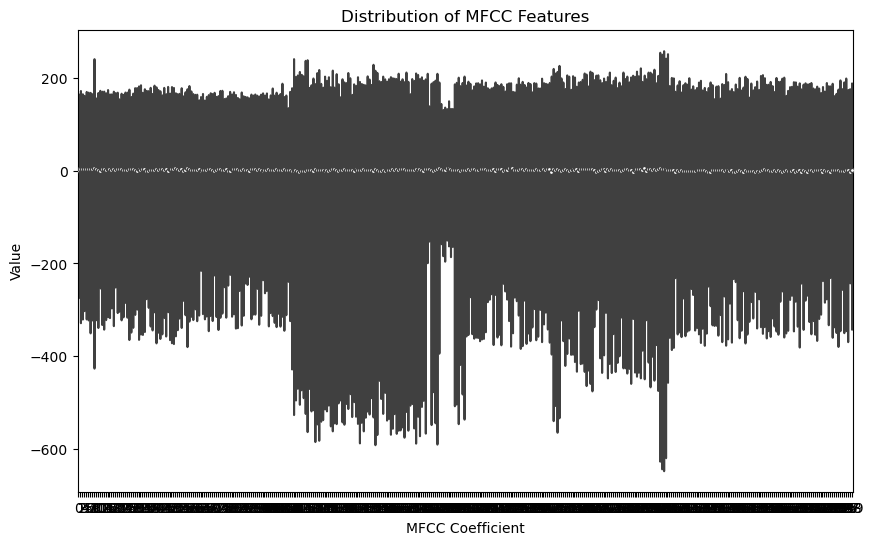

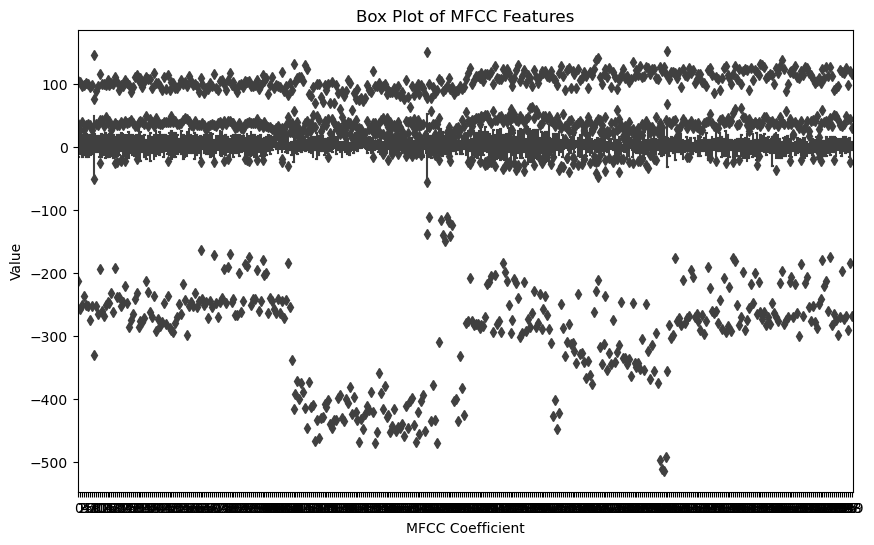

In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

# Define constants
data_path =data_path = r"C:\Users\hesham\OneDrive\سطح المكتب\torgo_data\train"
test_data_path =data_path = r"C:\Users\hesham\OneDrive\سطح المكتب\torgo_data\test"
sampling_rate = 22050
num_mfcc = 20
audio_duration = 3

# Function to load audio files and labels
def get_audio_files_and_labels(data_path):
    audio_files = []
    labels = []
    class_folders = sorted(os.listdir(data_path))
    label_encoder = LabelEncoder()

    for class_id, folder in enumerate(class_folders):
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                if file.endswith('.wav'):
                    audio_files.append(os.path.join(folder_path, file))
                    labels.append(class_id)

    encoded_labels = label_encoder.fit_transform(labels)

    return audio_files, encoded_labels, label_encoder

# Function to extract audio features
def extract_features(signal, sr):
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=num_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    
    return mfccs_mean

# Function to load and preprocess audio data
def load_and_preprocess_audio(audio_file):
    signal, sr = librosa.load(audio_file, sr=sampling_rate, res_type='kaiser_fast')
    return signal, sr

# Function to load audio files, extract features, and encode labels
def load_audio_files_and_extract_features(audio_files):
    features = []
    labels = []

    for audio_file in audio_files:
        signal, sr = load_and_preprocess_audio(audio_file)
        feature = extract_features(signal, sr)
        features.append(feature)

        label = os.path.basename(os.path.dirname(audio_file))
        labels.append(label)

    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    return np.array(features), np.array(encoded_labels), label_encoder

# Load and preprocess training data
train_audio_files, train_labels, label_encoder = get_audio_files_and_labels(data_path)
train_data, _, _ = load_audio_files_and_extract_features(train_audio_files)
train_data = np.reshape(train_data, (-1, num_mfcc, 1))

# Load and preprocess test data
test_audio_files, test_labels, _ = get_audio_files_and_labels(test_data_path)
test_data, _, _ = load_audio_files_and_extract_features(test_audio_files)
test_data = np.reshape(test_data, (-1, num_mfcc, 1))

# Define WaveNet architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_mfcc, 1)),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', padding='causal'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu', padding='causal'),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu', padding='causal', dilation_rate=2),
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu', padding='causal', dilation_rate=4),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adamw', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {accuracy}')

# Create a custom color palette with modern colors
modern_palette = sns.color_palette("husl", n_colors=num_mfcc)

# Extract and concatenate MFCC features from all test data
all_test_features = []
for audio_file in test_audio_files:
    signal, sr = load_and_preprocess_audio(audio_file)
    feature = extract_features(signal, sr)
    all_test_features.append(feature)

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=all_test_features, inner='box', palette=modern_palette)
plt.title('Distribution of MFCC Features')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Value')
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_test_features, palette=modern_palette)
plt.title('Box Plot of MFCC Features')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Value')
plt.show()


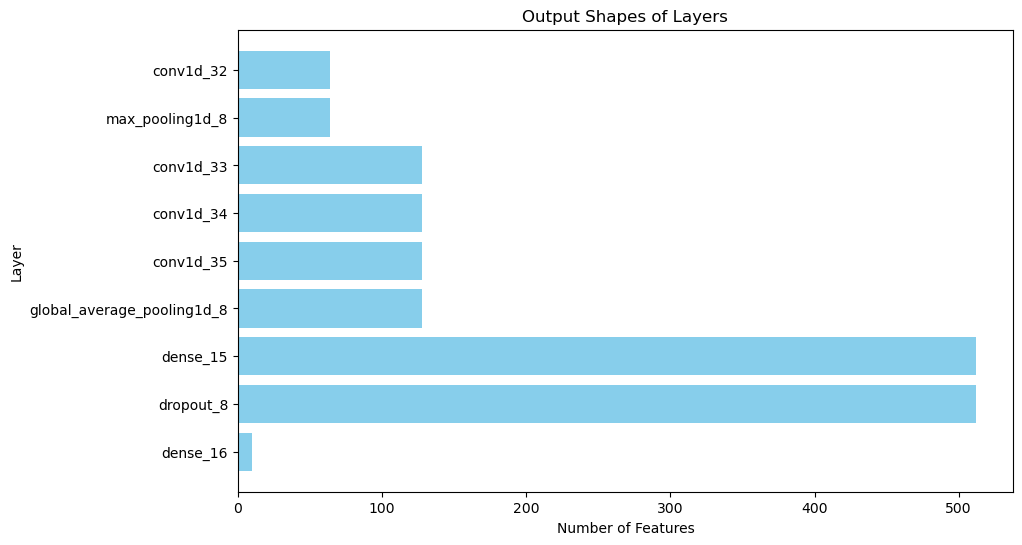

In [13]:
import matplotlib.pyplot as plt

# Define layer names and corresponding output shapes
layer_names = ['conv1d_32', 'max_pooling1d_8', 'conv1d_33', 'conv1d_34', 'conv1d_35', 
               'global_average_pooling1d_8', 'dense_15', 'dropout_8', 'dense_16']
output_shapes = [(20, 64), (10, 64), (10, 128), (10, 128), (10, 128), (128,), (512,), (512,), (10,)]

# Extract number of features for each layer
num_features = [shape[-1] if len(shape) > 1 else shape[0] for shape in output_shapes]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(layer_names, num_features, color='skyblue')
plt.xlabel('Number of Features')
plt.ylabel('Layer')
plt.title('Output Shapes of Layers')
plt.gca().invert_yaxis()  # Invert y-axis to display layers from top to bottom
plt.show()
